**Evento** : Germinación de la semilla

**Survival**: El evento de interes no ocurre

**Survival duration**: Tiempo hasta que ocurra el evento de interés (o el final de nuestras observaciones)

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Read the Excel sheet
df = pd.read_excel('DATOS T1 Y T9_V3-2.xlsx', sheet_name='Germina', usecols=['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410'])#, parse_dates=['H'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1_180  238 non-null    object
 1   T9_180  255 non-null    object
 2   T1_250  258 non-null    object
 3   T9_250  259 non-null    object
 4   T1_395  254 non-null    object
 5   T9_395  257 non-null    object
 6   T1_410  260 non-null    object
 7   T9_410  260 non-null    object
dtypes: object(8)
memory usage: 16.4+ KB


In [37]:
# Remove 'h' from values while preserving non-string values
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.replace(' h', '') if isinstance(x, str) else x)

df.head()

,T1_180,T9_180,T1_250,T9_250,T1_395,T9_395,T1_410,T9_410
0,12,28,14,13,16,15,10,10
1,28,28,14,13,16,35,29,28
2,12,28,9,13,16,35,30,11
3,12,13,9,13,16,15,30,28
4,28,28,9,13,16,15,30,28


In [38]:
df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']]=df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']].astype('float')
#df['Time']=melted_df['Time'].astype('float')

No handles with labels found to put in legend.


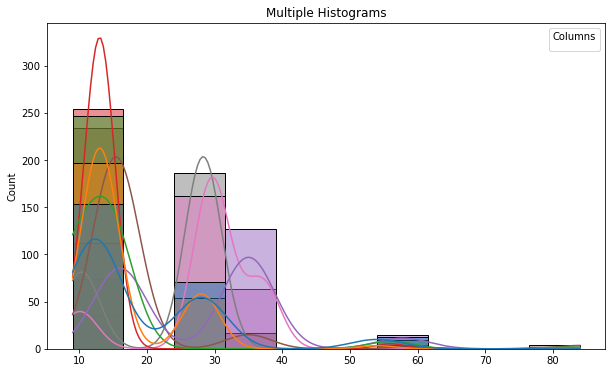

In [39]:
# Plot multiple histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, bins=10, kde=True)
plt.legend(title="Columns")
plt.title("Multiple Histograms")
plt.show()

<AxesSubplot:ylabel='Count'>

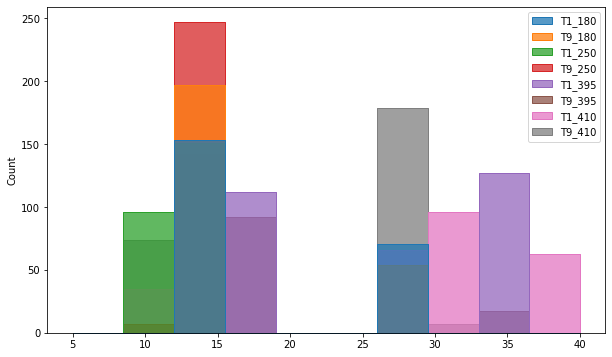

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, bins=10, binrange=(5,40), element="step")

In [41]:
melted_df['Time'].min()

9.0

In [42]:
# Melt the DataFrame to create 'Measurement' and 'Value' columns
melted_df = pd.melt(df, var_name="Measurement", value_name="Time")

In [43]:
melted_df.head()

,Measurement,Time
0,T1_180,12.0
1,T1_180,28.0
2,T1_180,12.0
3,T1_180,12.0
4,T1_180,28.0


In [44]:
# Extract the measurement type (T1 or T9) from the column name
melted_df["Type"] = melted_df["Measurement"].str.split("_").str[0]
melted_df["UV"] = melted_df["Measurement"].str.split("_").str[1]

In [45]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measurement  2080 non-null   object 
 1   Time         2041 non-null   float64
 2   Type         2080 non-null   object 
 3   UV           2080 non-null   object 
dtypes: float64(1), object(3)
memory usage: 65.1+ KB


In [46]:
melted_df['UV']=melted_df['UV'].astype('category')
melted_df['Time']=melted_df['Time'].astype('float')

<AxesSubplot:xlabel='UV', ylabel='Time'>

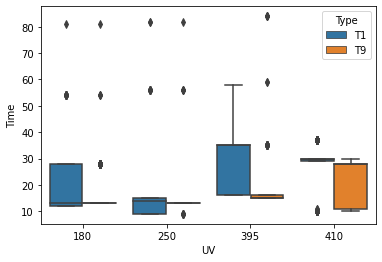

In [47]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Type")

<AxesSubplot:xlabel='UV', ylabel='Time'>

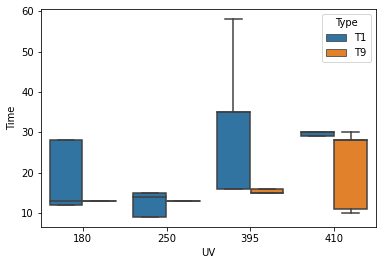

In [48]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Type", showfliers = False)

<AxesSubplot:xlabel='Time', ylabel='Count'>

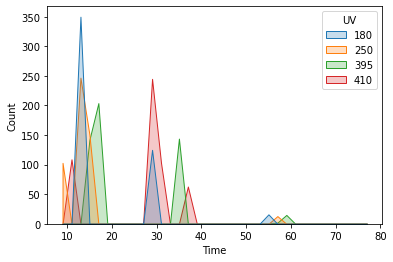

In [49]:
sns.histplot(data=melted_df,x="Time", hue="UV",element="poly", bins=range(8,80,2))

<AxesSubplot:xlabel='Time', ylabel='Count'>

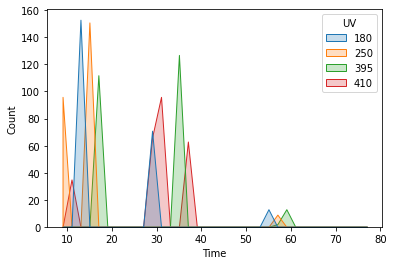

In [50]:
sns.histplot(data=melted_df[melted_df['Type']=='T1'],x="Time", hue="UV",element="poly", bins=range(8,80,2))

<AxesSubplot:xlabel='Time', ylabel='Count'>

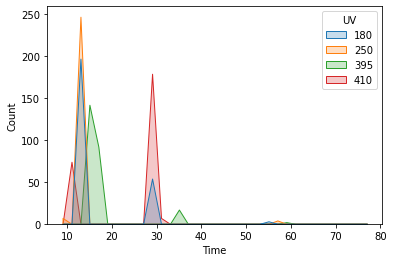

In [51]:
sns.histplot(data=melted_df[melted_df['Type']=='T9'],x="Time", hue="UV",element="poly", bins=range(8,80,2))

<AxesSubplot:xlabel='Time', ylabel='Density'>

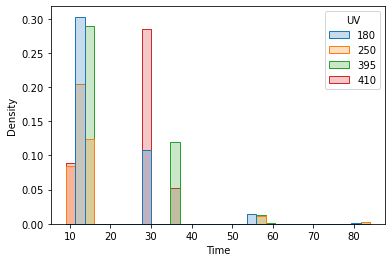

In [52]:
sns.histplot(
    melted_df, x="Time", hue="UV", element="step",
    stat="density", common_norm=False,
)

<AxesSubplot:xlabel='Time', ylabel='UV'>

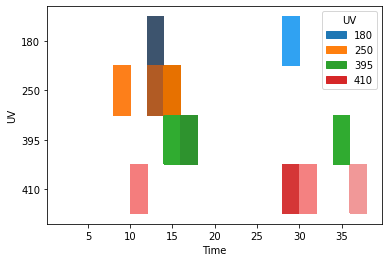

In [53]:
sns.histplot(data=melted_df, x="Time", y="UV", hue="UV", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='UV'>

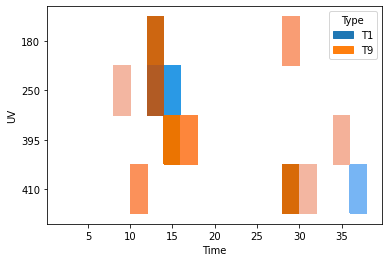

In [54]:
sns.histplot(data=melted_df, x="Time", y="UV", hue="Type", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='Type'>

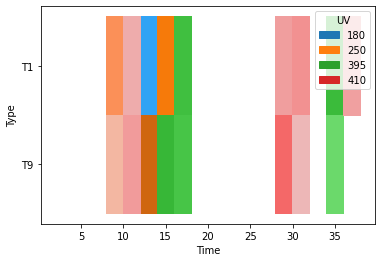

In [55]:
sns.histplot(data=melted_df, x="Time", y="Type", hue="UV", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='UV'>

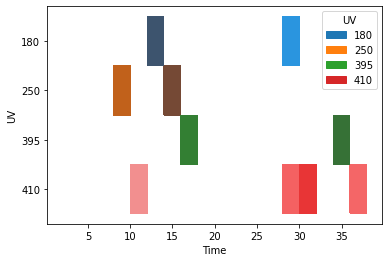

In [56]:
sns.histplot(data=melted_df[melted_df['Type']=='T1'], x="Time", y="UV", hue="UV", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='UV'>

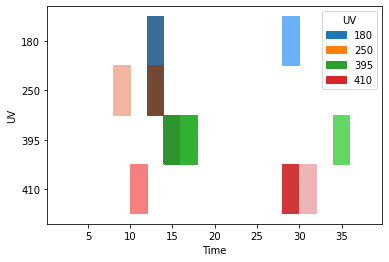

In [57]:
sns.histplot(data=melted_df[melted_df['Type']=='T9'], x="Time", y="UV", hue="UV", bins=range(2,40,2))

In [58]:
melted_df.head()

,Measurement,Time,Type,UV
0,T1_180,12.0,T1,180
1,T1_180,28.0,T1,180
2,T1_180,12.0,T1,180
3,T1_180,12.0,T1,180
4,T1_180,28.0,T1,180


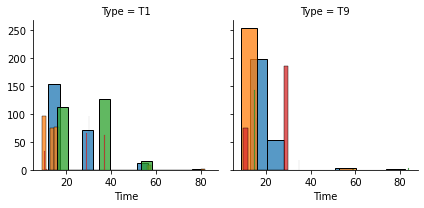

In [59]:
g = sns.FacetGrid(melted_df, col="Type", hue='UV')
g.map(sns.histplot, "Time")
#g.set_titles(col_template="{col_name}")
plt.show()

In [60]:
sns.histplot?

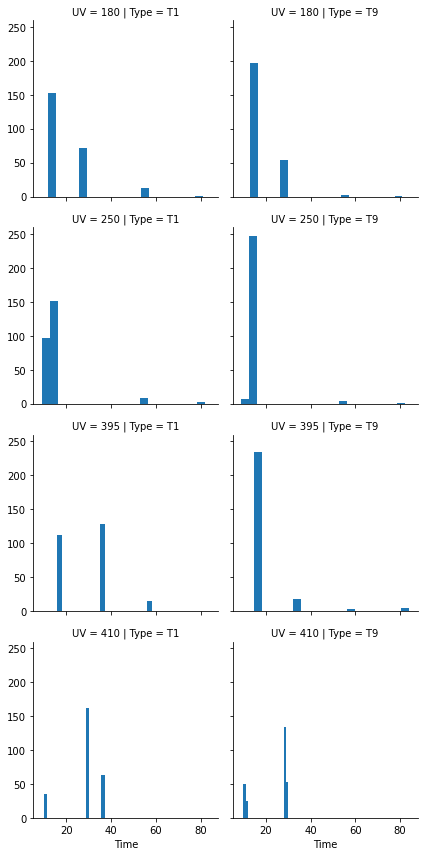

In [61]:
# Plot histograms grouped by 'Measurement_Type', using FacetGrid
g = sns.FacetGrid(melted_df, col="Type",row="UV")
g.map(plt.hist, "Time", bins=20)
#g.set_titles(col_template="{col_name}")
plt.show()

In [62]:
melted_df.head()

,Measurement,Time,Type,UV
0,T1_180,12.0,T1,180
1,T1_180,28.0,T1,180
2,T1_180,12.0,T1,180
3,T1_180,12.0,T1,180
4,T1_180,28.0,T1,180


In [63]:
seed260 = melted_df[melted_df['Measurement']!='T1_180'].copy()

In [64]:
seed260.head()

,Measurement,Time,Type,UV
260,T9_180,28.0,T9,180
261,T9_180,28.0,T9,180
262,T9_180,28.0,T9,180
263,T9_180,13.0,T9,180
264,T9_180,28.0,T9,180


In [65]:
new_df = df[:240][['T1_180']].copy()

new_df.rename(columns={'T1_180':'Time'}, inplace=True)

In [66]:
new_df['Time']=new_df['Time'].astype(float)

In [67]:
# Create a function to return 1 if observed 0 otherwise
def check_observed(row):
    if pd.isna(row['Time']):
        flag = 0
    else:
        flag = 1
    return flag

In [68]:
# Create a censorship flag column
new_df['observed'] = new_df.apply(check_observed, axis=1)

# Print average of observed: the proportion of censored data in the new_df
print(np.average(new_df['observed']))

# Count censored data
count = len(new_df[new_df['observed'] == 0])

# Print the count to console
print(count)

0.9916666666666667
2


In [69]:
seed260['observed'] = seed260.apply(check_observed, axis=1)

In [70]:
seed260.head()

,Measurement,Time,Type,UV,observed
260,T9_180,28.0,T9,180,1
261,T9_180,28.0,T9,180,1
262,T9_180,28.0,T9,180,1
263,T9_180,13.0,T9,180,1
264,T9_180,28.0,T9,180,1


In [71]:
# Count censored data
count = len(seed260[seed260['observed'] == 0])

# Print the count to console
print(count)

17


In [72]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      238 non-null    float64
 1   observed  240 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.9 KB


In [73]:
new_df_cleaned = new_df.dropna(subset=['Time', 'observed'])

In [74]:
from lifelines import KaplanMeierFitter

In [75]:
kmf = KaplanMeierFitter()


#kmf.plot_survival_function()

In [76]:
kmf.fit(durations= new_df_cleaned['Time'], event_observed= new_df_cleaned['observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 238 total observations, 0 right-censored observations>

<AxesSubplot:xlabel='timeline'>

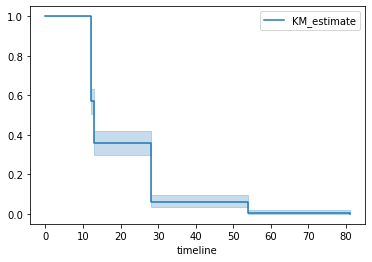

In [77]:
kmf.plot_survival_function()

In [80]:
# Print out the median survival duration 
print(kmf.median_survival_time_)

print(1-kmf.predict(20))

13.0
0.6428571428571429


In [83]:
seed260.dropna(subset=['Time', 'observed'], inplace= True)

In [84]:
seeds_kmf = KaplanMeierFitter()

Text(0.5, 1.0, 'Material T1')

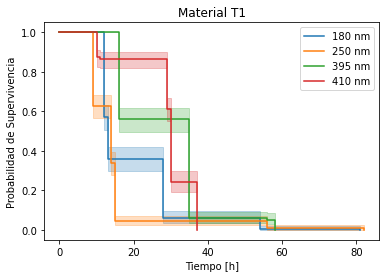

In [94]:
ax = plt.subplot(111)

kmf.plot_survival_function(ax=ax, label='180 nm')

seeds_kmf.fit(seed260[seed260['Measurement'] =='T1_250']['Time'], seed260[seed260['Measurement'] == 'T1_250']['observed'], label='T1_250')
seeds_kmf.plot_survival_function(ax=ax, label='250 nm')


seeds_kmf.fit(seed260[seed260['Measurement'] =='T1_395']['Time'], seed260[seed260['Measurement'] == 'T1_395']['observed'], label='T1_395')

seeds_kmf.plot_survival_function(ax=ax, label='395 nm')

seeds_kmf.fit(seed260[seed260['Measurement'] =='T1_410']['Time'], seed260[seed260['Measurement'] == 'T1_410']['observed'], label='T1_410')
seeds_kmf.plot_survival_function(ax=ax, label='410 nm')

# Customize the plot as needed (e.g., add labels, title, etc.)
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T1')

In [127]:
# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare patients with and without pericardial effusion
patient_results = logrank_test(durations_A=seed260[seed260['Measurement'] =='T1_395']['Time'],
                               durations_B=seed260[seed260['Measurement'] =='T1_250']['Time'], 
                               event_observed_A=seed260[seed260['Measurement'] == 'T1_395']['observed'], 
                               event_observed_B=seed260[seed260['Measurement'] == 'T1_250']['observed'])

In [128]:
# Print out the p-value of log-rank test results
print(patient_results.p_value)

1.0006608840220045e-83


In [122]:
logrank_test?

In [115]:
T1 = [1, 4, 10, 12, 12, 3, 5.4]
E1 = [1, 0, 1,  0,  1,  1, 1]

T2 = [4, 5, 7, 11, 14, 20, 8, 8]
E2 = [1, 1, 1, 1,  1,  1,  1, 1]

In [117]:
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


In [118]:
print(results.p_value)        # 0.7676
print(results.test_statistic)

0.7676913033364599
0.08725886275434053


In [119]:
results.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.09 0.77      0.38

In [121]:
type(seed260[seed260['Measurement'] =='T1_250']['Time'])

pandas.core.series.Series

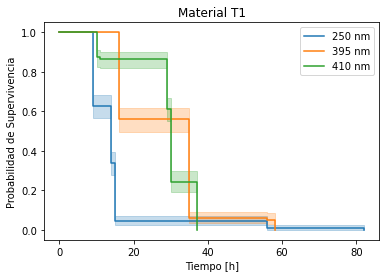

In [134]:
def plot_survival(ax, label, time, observed):
    kmf = KaplanMeierFitter()
    kmf.fit(time, observed, label=label)
    kmf.plot_survival_function(ax=ax, label=label)

# Data for different measurements
measurements = ['T1_250', 'T1_395', 'T1_410']
colors = ['250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()

for measurement, color in zip(measurements, colors):
    time_data = seed260[seed260['Measurement'] == measurement]['Time']
    observed_data = seed260[seed260['Measurement'] == measurement]['observed']
    plot_survival(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T1')
ax.legend()

# Show the plot
plt.show()


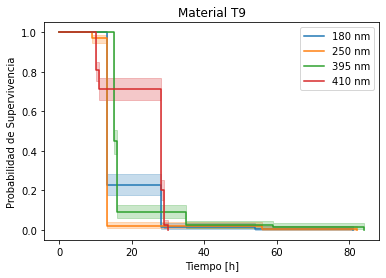

In [137]:
# Data for different measurements
measurements = ['T9_180','T9_250', 'T9_395', 'T9_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()

for measurement, color in zip(measurements, colors):
    time_data = seed260[seed260['Measurement'] == measurement]['Time']
    observed_data = seed260[seed260['Measurement'] == measurement]['observed']
    plot_survival(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T9')
ax.legend()

# Show the plot
plt.show()

In [138]:
def median_survival(label, time, observed):
    kmf = KaplanMeierFitter()
    kmf.fit(time, observed, label=label)
    print(label,kmf.median_survival_time_)


for measurement, color in zip(measurements, colors):
    time_data = seed260[seed260['Measurement'] == measurement]['Time']
    observed_data = seed260[seed260['Measurement'] == measurement]['observed']
    median_survival(color, time_data, observed_data)

180 nm 13.0
250 nm 13.0
395 nm 15.0
410 nm 28.0
